## Convert Cisco Data to NPZ for DG

In [32]:
import pandas as pd
import sys
import os
import pickle
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

In [33]:
def autonorm(vector_in, min_range, max_range):
    diff = max_range-min_range
    maxmin = max(vector_in)-min(vector_in)
    if maxmin == 0:
        return np.ones(len(vector_in))*np.mean([min_range, max_range])
    vector_out = ((vector_in - min(vector_in))*diff)/(max(vector_in)-min(vector_in))+min_range
    return vector_out

In [34]:
cisco_data = pd.read_csv("bgpclear.csv")
unique_names = cisco_data.name.unique()

C:\Users\max\AppData\Local\Temp\ipykernel_13852\3946338547.py:1: DtypeWarning: Columns (1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  cisco_data = pd.read_csv("bgpclear.csv")


In [35]:
grouped_data = cisco_data.groupby("name")
dict={}

for i in range(0,len(unique_names)):
    x = unique_names[i].split('/', 100)
    key = str(x[len(x)-1])
    y = grouped_data.get_group(unique_names[i])
    y = y.dropna(axis=1, how = 'all')
    y = y.dropna()
    dict[key] = y

Producer will be 1-H encoded. Ex. dr01 is [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

features are all normalized to [-1 1].

## Actually, we only care about these:
Features to explore according to paper:

		"active-routes-count",
		"as",
		"backup-routes-count",
		"deleted-routes-count",
		"paths-count",
		"protocol-route-memory",
		"routes-counts",
		"global__established-neighbors-count-total",
		"global__neighbors-count-total",
		"global__nexthop-count",
		"global__restart-count",
		"performance-statistics__global__configuration-items-processed",
		"performance-statistics__global__ipv4rib-server__rib-connection-up-count",
		"performance-statistics__vrf__inbound-update-messages",
		"vrf__neighbors-count",
		"vrf__network-count",
		"vrf__path-count",
		"vrf__update-messages-received"
        
Producer to explore according to paper:

		"leaf1", "leaf2", "leaf3",
		"leaf5", "leaf6", "leaf7", "leaf8",
		"spine1", "spine2", "spine3", "spine4"

We only care about the name 'information' and 'process-info'

In [109]:
dict["information"]

,name,time,EncodingPath,Producer,active-routes-count,af-name,as,backup-routes-count,deleted-routes-count,paths-count,protocol-route-memory,route-table-name,routes-counts,saf-name,vrf-name
702423,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754072913000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf2,162,IPv4,65022,1,0,925,124464,default,163,Unicast,default
702424,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073044000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,spine3,152,IPv4,65013,0,0,1152,148480,default,152,Unicast,default
702425,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073111000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf8,164,IPv4,65028,0,0,957,128176,default,164,Unicast,default
702426,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073432000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf1,165,IPv4,65021,1,0,982,131232,default,166,Unicast,default
702427,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073573000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf6,164,IPv4,65026,0,0,980,130752,default,164,Unicast,default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711051,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757071498000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf1,165,IPv4,65021,1,0,982,131232,default,166,Unicast,default
711052,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757071716000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf5,165,IPv4,65025,0,0,980,130880,default,165,Unicast,default
711053,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757072242000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf7,164,IPv4,65027,0,0,967,129296,default,164,Unicast,default
711054,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757072545000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,dr01,167,IPv4,65501,1,0,772,107968,default,168,Unicast,default


In [ ]:
dict["process-info"]

## How to Set Up DF?
Since we don't care about time, or name, only the producer metadata, we can simplify the df into first parsing each relevent dataset with the features we care about, then, combine both of them delimited via the producer.

In [36]:
unique_producers = ["leaf1", "leaf2", "leaf3", "leaf5", "leaf6", "leaf7", "leaf8", "spine1", "spine2", "spine3", "spine4"]
features = [ "active-routes-count",
    "as",
    "backup-routes-count",
    "deleted-routes-count",
    "paths-count",
    "protocol-route-memory",
    "routes-counts",
    "global__established-neighbors-count-total",
    "global__neighbors-count-total",
    "global__nexthop-count",
    "global__restart-count",
    "performance-statistics__global__configuration-items-processed",
    "performance-statistics__global__ipv4rib-server__rib-connection-up-count",
    "performance-statistics__vrf__inbound-update-messages",
    "vrf__neighbors-count",
    "vrf__network-count",
    "vrf__path-count",
    "vrf__update-messages-received"]
t_features = [ "active-routes-count",
    "as",
    "backup-routes-count",
    "deleted-routes-count",
    "paths-count",
    "protocol-route-memory",
    "routes-counts",
    "global__established-neighbors-count-total",
    "global__neighbors-count-total",
    "global__nexthop-count",
    "global__restart-count",
    "performance-statistics__global__configuration-items-processed",
    "performance-statistics__global__ipv4rib-server__rib-connection-up-count",
    "performance-statistics__vrf__inbound-update-messages",
    "vrf__neighbors-count",
    "vrf__network-count",
    "vrf__path-count",
    "vrf__update-messages-received"]

In [37]:
info_df = dict["information"]
info_df = info_df.loc[info_df['Producer'].isin(unique_producers)]
info_df = info_df.reset_index()
info_df

,index,name,time,EncodingPath,Producer,active-routes-count,af-name,as,backup-routes-count,deleted-routes-count,paths-count,protocol-route-memory,route-table-name,routes-counts,saf-name,vrf-name
0,702423,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754072913000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf2,162,IPv4,65022,1,0,925,124464,default,163,Unicast,default
1,702424,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073044000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,spine3,152,IPv4,65013,0,0,1152,148480,default,152,Unicast,default
2,702425,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073111000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf8,164,IPv4,65028,0,0,957,128176,default,164,Unicast,default
3,702426,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073432000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf1,165,IPv4,65021,1,0,982,131232,default,166,Unicast,default
4,702427,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073573000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf6,164,IPv4,65026,0,0,980,130752,default,164,Unicast,default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,711050,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757070667000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf3,164,IPv4,65023,0,0,947,127056,default,164,Unicast,default
7373,711051,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757071498000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf1,165,IPv4,65021,1,0,982,131232,default,166,Unicast,default
7374,711052,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757071716000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf5,165,IPv4,65025,0,0,980,130880,default,165,Unicast,default
7375,711053,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757072242000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf7,164,IPv4,65027,0,0,967,129296,default,164,Unicast,default


In [38]:
process_df = dict["process-info"]
process_df = process_df.loc[process_df['Producer'].isin(unique_producers)]
process_df = process_df.reset_index()
process_df = process_df.rename(columns = {"Producer":"Producer2"})
process_df

,index,name,time,EncodingPath,Producer2,global__established-neighbors-count-total,global__neighbors-count-total,global__nexthop-count,global__restart-count,instance-name,performance-statistics__global__configuration-items-processed,performance-statistics__global__ipv4rib-server__is-rib-connection-up,performance-statistics__global__ipv4rib-server__rib-connection-up-count,performance-statistics__vrf__inbound-update-messages,vrf-name,vrf__neighbors-count,vrf__network-count,vrf__path-count,vrf__update-messages-received
0,711057,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498754073016000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf2,37,39,151,2,default,2,true,1,67221,default,39,352,5857,67221
1,711058,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498754073189000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,spine3,56,64,231,2,default,14,true,1,63498,default,64,352,8353,63498
2,711059,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498754073223000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf8,39,40,147,2,default,3,true,1,67186,default,40,352,5937,67186
3,711060,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498754073547000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,38,38,140,2,default,5,true,1,69236,default,38,352,4769,69236
4,711061,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498754073726000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf6,38,38,145,2,default,2,true,1,68497,default,38,352,6213,68497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,719684,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498757070778000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf3,37,39,151,2,default,2,true,1,76731,default,39,352,5990,76731
7373,719685,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498757071684000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,38,38,140,2,default,6,true,1,72822,default,38,352,4687,72822
7374,719686,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498757071851000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf5,37,37,139,2,default,2,true,1,69748,default,37,352,5297,69748
7375,719687,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498757072352000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf7,38,38,145,2,default,2,true,1,71863,default,38,352,6213,71863


In [31]:
process_df[process_df["Producer2"] == "leaf1"]

,index,name,time,EncodingPath,Producer2,global__established-neighbors-count-total,global__neighbors-count-total,global__nexthop-count,global__restart-count,instance-name,performance-statistics__global__configuration-items-processed,performance-statistics__global__ipv4rib-server__is-rib-connection-up,performance-statistics__global__ipv4rib-server__rib-connection-up-count,performance-statistics__vrf__inbound-update-messages,vrf-name,vrf__neighbors-count,vrf__network-count,vrf__path-count,vrf__update-messages-received
3,711060,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498754073547000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,38,38,140,2,default,5,true,1,69236,default,38,352,4769,69236
14,711073,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498754078037000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,38,38,140,2,default,5,true,1,69236,default,38,352,4769,69236
25,711085,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498754082520000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,38,38,140,2,default,5,true,1,69236,default,38,352,4769,69236
36,711098,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498754086993000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,38,38,140,2,default,5,true,1,69236,default,38,352,4769,69236
47,711110,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498754091502000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,38,38,140,2,default,5,true,1,69236,default,38,352,4769,69236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7329,719635,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498757053569000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,38,38,140,2,default,6,true,1,72822,default,38,352,4687,72822
7340,719648,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498757058135000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,38,38,140,2,default,6,true,1,72822,default,38,352,4687,72822
7351,719660,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498757062749000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,38,38,140,2,default,6,true,1,72822,default,38,352,4687,72822
7362,719673,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,1498757067147000000,Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/insta...,leaf1,38,38,140,2,default,6,true,1,72822,default,38,352,4687,72822


(array([  3.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   1.,   0.,   0.,   7.,   1.,   0.,   1.,   0.,
          0.,   0.,   1.,   1.,   1.,   0.,  14.,   0.,   1.,   0.,   4.,
          1.,   3.,   0.,   2.,   2., 618.]),
 array([ 0.  ,  0.74,  1.48,  2.22,  2.96,  3.7 ,  4.44,  5.18,  5.92,
         6.66,  7.4 ,  8.14,  8.88,  9.62, 10.36, 11.1 , 11.84, 12.58,
        13.32, 14.06, 14.8 , 15.54, 16.28, 17.02, 17.76, 18.5 , 19.24,
        19.98, 20.72, 21.46, 22.2 , 22.94, 23.68, 24.42, 25.16, 25.9 ,
        26.64, 27.38, 28.12, 28.86, 29.6 , 30.34, 31.08, 31.82, 32.56,
        33.3 , 34.04, 34.78, 35.52, 36.26, 37.  ]),
 <BarContainer object of 50 artists>)

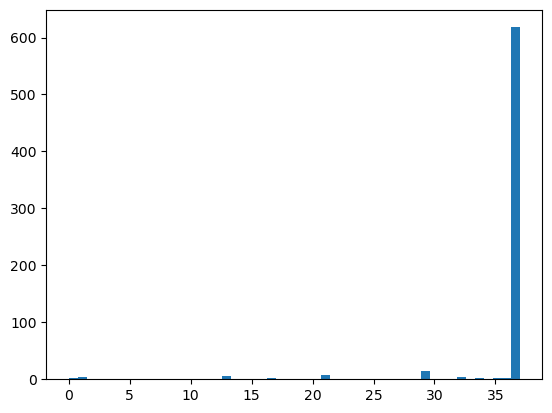

In [8]:
ggg = process_df[process_df['Producer2']==unique_producers[1]]
ggg = ggg[features]
ggg_np = ggg.to_numpy()
ggg_np = ggg_np.astype(float)
plt.hist(ggg_np,bins=50)

In [10]:
#leaf1_proc = process_df[process_df['Producer'] == "leaf1"].reset_index()
#leaf1_info = info_df[info_df['Producer'] == "leaf1"].reset_index()


active-routes-count
['162' '152' '164' '165' '153' '0' '159' '160' '161' '158' '157']
as
['65022' '65013' '65028' '65021' '65026' '65011' '65025' '65014' '65027'
 '65023' '65012']
backup-routes-count
['1' '0']
deleted-routes-count
['0' '166' '153' '3' '164' '152' '4' '163' '8']
paths-count
['925' '1152' '957' '982' '980' '1180' '967' '947' '0' '1328' '1304' '166'
 '1119' '976' '1051' '1116' '1012' '970' '1078' '1028' '1045' '1019'
 '1021' '1072' '1000' '1140' '1080' '961' '306' '454' '584' '879' '1044'
 '974' '1412' '1416' '927' '1436' '962' '960' '950' '971' '943' '913'
 '1408' '1428' '973' '955' '1440' '199' '372' '681' '677' '1065' '1083'
 '997' '1104' '1132' '1110' '1100' '304' '953' '1196' '1109' '928' '938'
 '1340' '915' '944' '931' '978' '1380' '1384' '924' '163' '893' '871'
 '1372' '936' '1392' '294' '456' '561' '742' '1022' '709' '1296' '1112'
 '1128' '914' '1164' '901' '956' '909' '917' '993' '847' '1007' '904'
 '848' '1014' '995' '948' '1024' '852' '988' '949' '859' '152' '1

In [11]:
process_df['Producer'].value_counts()

leaf7     678
leaf8     677
leaf5     675
leaf2     673
leaf6     673
leaf3     672
spine3    668
leaf1     667
spine1    665
spine4    665
spine2    664
Name: Producer, dtype: int64

In [12]:
info_df['Producer'].value_counts()

leaf7     678
leaf8     677
leaf5     675
leaf2     673
leaf6     673
leaf3     672
spine3    668
leaf1     667
spine1    665
spine4    665
spine2    664
Name: Producer, dtype: int64

In [9]:
combined = pd.concat([process_df, info_df], axis = 1)
unique_vals = combined[t_features]
for col in unique_vals:
    print(col)
    print(unique_vals[col].unique())

active-routes-count
['162' '152' '164' '165' '153' '0' '159' '160' '161' '158' '157']
as
['65022' '65013' '65028' '65021' '65026' '65011' '65025' '65014' '65027'
 '65023' '65012']
backup-routes-count
['1' '0']
deleted-routes-count
['0' '166' '153' '3' '164' '152' '4' '163' '8']
paths-count
['925' '1152' '957' '982' '980' '1180' '967' '947' '0' '1328' '1304' '166'
 '1119' '976' '1051' '1116' '1012' '970' '1078' '1028' '1045' '1019'
 '1021' '1072' '1000' '1140' '1080' '961' '306' '454' '584' '879' '1044'
 '974' '1412' '1416' '927' '1436' '962' '960' '950' '971' '943' '913'
 '1408' '1428' '973' '955' '1440' '199' '372' '681' '677' '1065' '1083'
 '997' '1104' '1132' '1110' '1100' '304' '953' '1196' '1109' '928' '938'
 '1340' '915' '944' '931' '978' '1380' '1384' '924' '163' '893' '871'
 '1372' '936' '1392' '294' '456' '561' '742' '1022' '709' '1296' '1112'
 '1128' '914' '1164' '901' '956' '909' '917' '993' '847' '1007' '904'
 '848' '1014' '995' '948' '1024' '852' '988' '949' '859' '152' '1

In [10]:
prod_info_df = info_df[info_df['Producer'] == 'leaf1'].reset_index() #selecting unqiue producers
prod_process_df = process_df[process_df['Producer2'] == 'leaf1'].reset_index() #now both info and process dfs
                                      #are only looking at a single producer
combined = pd.concat([prod_info_df, prod_process_df], axis = 1) #one df with one producer
"""combined = combined[features] #selecting only feature we care about
comb_numpy = combined.to_numpy()
comb_numpy = comb_numpy.astype(float)
plt.hist(comb_numpy)"""


'combined = combined[features] #selecting only feature we care about\ncomb_numpy = combined.to_numpy()\ncomb_numpy = comb_numpy.astype(float)\nplt.hist(comb_numpy)'

In [211]:
(combined[features]==z)

vrf__update-messages-received    True
dtype: bool

In [208]:
z = z.reset_index()
z = z[features]


In [178]:
x = combined[features]
x_np = x.to_numpy()
x_np = x_np.astype(float)
"""plt.hist(x_np)"""
x_np

array([[69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.],
       [69236.

(array([  7.,   1.,   4.,  11.,   3.,  21., 614.,   0.,   0.,  12.]),
 array([ 0. ,  5.6, 11.2, 16.8, 22.4, 28. , 33.6, 39.2, 44.8, 50.4, 56. ]),
 <BarContainer object of 10 artists>)

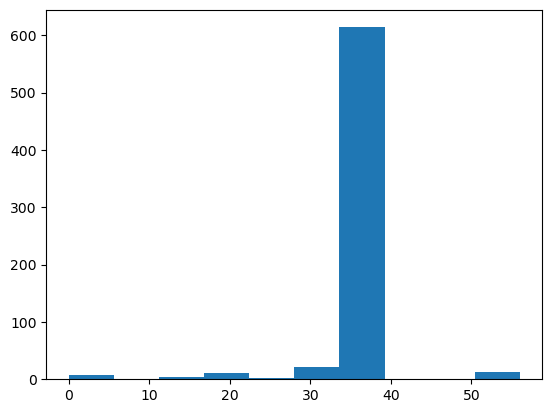

In [233]:
z= combined_unique[combined_unique['Producer']=='leaf2']
z = z[features]
z_np = z.to_numpy()
z_np = z_np.astype(float)
plt.hist(z_np)


In [39]:
complete_array = np.zeros([11,678,18])
padding_hist = np.zeros([len(unique_producers)])
flag = np.zeros([len(unique_producers), 678])
count = 0
print(len(complete_array[5]))
for producer in unique_producers:
    prod_info_df = info_df[info_df['Producer'] == producer].reset_index() #selecting unqiue producers
    prod_process_df = process_df[process_df['Producer2'] == producer].reset_index() #now both info and process dfs
                                      #are only looking at a single producer
    combined = pd.concat([prod_info_df, prod_process_df], axis = 1) #one df with one producer
    combined = combined[features] #selecting only feature we care about
    #print(combined)
    #converting to numpy array
    comb_numpy = combined.to_numpy()
    comb_numpy = comb_numpy.astype(float)
    #print(comb_numpy)
    #print(comb_numpy)
    #normalization to -1 to 1
    comb_numpy_t = np.transpose(comb_numpy)
    comb_numpy_norm = comb_numpy_t
    #print(comb_numpy_norm)
    
    for i in range(len(comb_numpy_t)):
        comb_numpy_norm[i] = autonorm(comb_numpy_t[i], 0, 1)
        #pass
    comb_numpy_norm = np.transpose(comb_numpy_norm)
    print(comb_numpy_norm)
    #need to pad w zeros now
    
    #print(len(comb_numpy_norm))
    
    #padding with zeros
    
    pad = np.pad(comb_numpy_norm, [(0, len(complete_array[0]) - len(comb_numpy_norm)), (0, 0)], mode='constant')
    
    flag_pad = np.ones([1, len(comb_numpy_norm)])
    flag_pad = np.pad(flag_pad, [(0, 0), (0, len(complete_array[0]) - len(comb_numpy_norm))], mode='constant')
    
    complete_array[count] = pad
    flag[count] = flag_pad
    padding_hist[count] = len(complete_array[0]) - len(comb_numpy_norm)
    print(f"Padding {producer} with {len(complete_array[0]) - len(comb_numpy_norm)}")
    print(" ")
    count+=1

678
[[1.         0.5        1.         ... 1.         0.72937548 0.        ]
 [1.         0.5        1.         ... 1.         0.72937548 0.        ]
 [1.         0.5        1.         ... 1.         0.72937548 0.        ]
 ...
 [1.         0.5        1.         ... 1.         0.71673092 1.        ]
 [1.         0.5        1.         ... 1.         0.71673092 1.        ]
 [1.         0.5        1.         ... 1.         0.71673092 1.        ]]
Padding leaf1 with 11
 
[[1.         0.5        1.         ... 0.5        0.92141952 0.        ]
 [1.         0.5        1.         ... 0.5        0.92141952 0.        ]
 [1.         0.5        1.         ... 0.5        0.92141952 0.        ]
 ...
 [1.         0.5        1.         ... 0.5        0.93441065 1.        ]
 [1.         0.5        1.         ... 0.5        0.93441065 1.        ]
 [1.         0.5        1.         ... 0.5        0.93441065 1.        ]]
Padding leaf2 with 5
 
[[0.5 0.5 0.5 ... 0.5 1.  0. ]
 [0.5 0.5 0.5 ... 0.5 1.  0. ]

In [40]:
n_features = np.size(features)
length_array = np.zeros([n_features])
count  = 0
combined_unique = pd.concat([process_df, info_df], axis = 1)
unique_vals = combined_unique[features]
total_unique_values = np.ndarray([])
for col in unique_vals:
    #print(col)
    #print(unique_vals[col].unique())
    length_array[count] = len(unique_vals[col].unique())
    unique = unique_vals[col].unique()
    unique = unique.astype(int)
    if count == 0:
        total_unique_values = unique
    else:
        total_unique_values = np.concatenate((total_unique_values,unique),axis = 0)
    count+=1
print(length_array)
print(total_unique_values)

[ 11.  11.   2.   9. 152. 186.  12.  53.   5.   6.   1.  12.   1. 505.
   5.   8. 336. 505.]
[  162   152   164 ... 69472 70689 72822]


array([1.        , 0.5       , 1.        , 0.        , 0.87756926,
       0.87756926, 1.        , 1.        , 0.5       , 0.5       ,
       0.5       , 1.        , 0.5       , 1.        , 0.5       ,
       1.        , 0.71673092, 1.        ])

In [50]:
from rdt.transformers.categorical import OneHotEncoder
from rdt import HyperTransformer
ht = HyperTransformer()
ohe = OneHotEncoder()

In [54]:
from rdt import get_demo
customers = get_demo()

In [90]:
z = combined_unique[features]
#z = z.drop(z.columns[1],axis = 1)
print(z)

     vrf__update-messages-received
0                            67221
1                            63498
2                            67186
3                            69236
4                            68497
...                            ...
7372                         76731
7373                         72822
7374                         69748
7375                         71863
7376                         69472

[7377 rows x 1 columns]


In [92]:
v = combined_unique[features]
ht.detect_initial_config(data=v)
config = ht.get_config()
print(config)
ht.update_transformers(column_name_to_transformer={
  "vrf__update-messages-received": ohe
})
print(config)

{
    "sdtypes": {
        "vrf__update-messages-received": "categorical"
    },
    "transformers": {
        "vrf__update-messages-received": FrequencyEncoder()
    }
}
{
    "sdtypes": {
        "vrf__update-messages-received": "categorical"
    },
    "transformers": {
        "vrf__update-messages-received": OneHotEncoder()
    }
}


In [94]:
ht.fit(combined_unique[features])
x = ht.transform(combined_unique[features])


In [106]:
z = combined_unique["Producer"]
full = pd.concat([z,x],axis=1)
full

,Producer,vrf__update-messages-received.value0,vrf__update-messages-received.value1,vrf__update-messages-received.value2,vrf__update-messages-received.value3,vrf__update-messages-received.value4,vrf__update-messages-received.value5,vrf__update-messages-received.value6,vrf__update-messages-received.value7,vrf__update-messages-received.value8,...,vrf__update-messages-received.value495,vrf__update-messages-received.value496,vrf__update-messages-received.value497,vrf__update-messages-received.value498,vrf__update-messages-received.value499,vrf__update-messages-received.value500,vrf__update-messages-received.value501,vrf__update-messages-received.value502,vrf__update-messages-received.value503,vrf__update-messages-received.value504
0,leaf2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,spine3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,leaf8,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,leaf1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,leaf6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,leaf3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7373,leaf1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7374,leaf5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7375,leaf7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
combined_unique[features]

,vrf__update-messages-received
0,67221
1,63498
2,67186
3,69236
4,68497
...,...
7372,76731
7373,72822
7374,69748
7375,71863


In [35]:
from cont_to_disc import Continuous_to_Discrete

In [12]:
complete_array = np.zeros([11,678,1])
padding_hist = np.zeros([len(unique_producers)])
flag = np.zeros([len(unique_producers), 678])
count = 0
print(len(complete_array[5]))


for producer in unique_producers:
    prod_info_df = info_df[info_df['Producer'] == producer].reset_index() #selecting unqiue producers
    prod_process_df = process_df[process_df['Producer'] == producer].reset_index() #now both info and process dfs
                                      #are only looking at a single producer
    combined = pd.concat([prod_info_df, prod_process_df], axis = 1) #one df with one producer
    combined = combined[features] #selecting only feature we care about
    #print(combined)
    #converting to numpy array
    comb_numpy = combined.to_numpy()
    comb_numpy = comb_numpy.astype(int)
    
    #test = Continuous_to_Discrete(comb_numpy,length_array,total_unique_values)
    
    
    #print(comb_numpy)
    #normalization to -1 to 1
    comb_numpy_t = np.transpose(comb_numpy)
    comb_numpy_norm = comb_numpy_t
    
    for i in range(len(comb_numpy_t)):
        #comb_numpy_norm[i] = autonorm(comb_numpy_t[i], 0, 1)
        pass
    comb_numpy_norm = np.transpose(comb_numpy_t)
    #need to pad w zeros now
    
    print(len(comb_numpy_norm))
    
    #padding with zeros
    
    pad = np.pad(comb_numpy_norm, [(0, len(complete_array[0]) - len(comb_numpy_norm)), (0, 0)], mode='constant')
    
    flag_pad = np.ones([1, len(comb_numpy_norm)])
    flag_pad = np.pad(flag_pad, [(0, 0), (0, len(complete_array[0]) - len(comb_numpy_norm))], mode='constant')
    
    complete_array[count] = pad
    flag[count] = flag_pad
    padding_hist[count] = len(complete_array[0]) - len(comb_numpy_norm)
    print(f"Padding {producer} with {len(complete_array[0]) - len(comb_numpy_norm)}")
    print(" ")
    count+=1

678


KeyError: 'Producer'

In [14]:
zoinks = combined_unique[combined_unique["Producer"] == unique_producers[0]]
zoinks = combined[features]
zoinks = zoinks.to_numpy()
zoinks = zoinks.astype(float)
print(zoinks)
plt.hist(zoinks)

NameError: name 'combined_unique' is not defined

In [159]:
combined.head(3)

,vrf__update-messages-received
0,69236
1,69236
2,69236


(array([211., 449.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,   1.]),
 array([ 63498. ,  70723.8,  77949.6,  85175.4,  92401.2,  99627. ,
        106852.8, 114078.6, 121304.4, 128530.2, 135756. ]),
 <BarContainer object of 10 artists>)

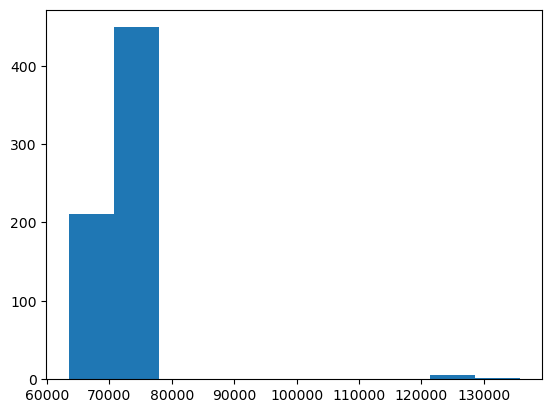

In [164]:
x=combined_unique[combined_unique['Producer']=='leaf1']
x = x[features]
x_np = x.to_numpy()
x_np = x_np.astype(float)
plt.hist(x_np)

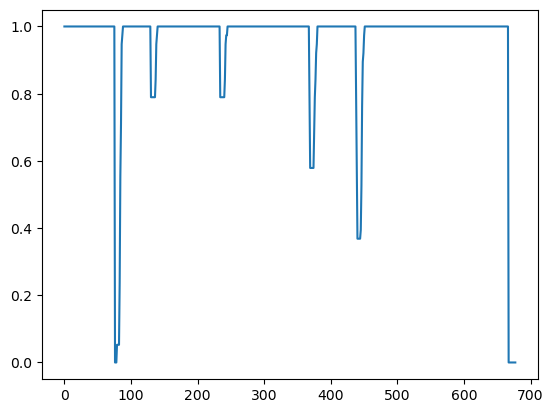

In [15]:
plt.plot(complete_array[0])

In [10]:
pd.concat([info_df, process_df], axis = 1)

,index,name,time,EncodingPath,Producer,active-routes-count,af-name,as,backup-routes-count,deleted-routes-count,...,instance-name,performance-statistics__global__configuration-items-processed,performance-statistics__global__ipv4rib-server__is-rib-connection-up,performance-statistics__global__ipv4rib-server__rib-connection-up-count,performance-statistics__vrf__inbound-update-messages,vrf-name,vrf__neighbors-count,vrf__network-count,vrf__path-count,vrf__update-messages-received
0,702423,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754072913000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf2,162,IPv4,65022,1,0,...,default,2,true,1,67221,default,39,352,5857,67221
1,702424,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073044000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,spine3,152,IPv4,65013,0,0,...,default,14,true,1,63498,default,64,352,8353,63498
2,702425,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073111000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf8,164,IPv4,65028,0,0,...,default,3,true,1,67186,default,40,352,5937,67186
3,702426,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073432000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf1,165,IPv4,65021,1,0,...,default,5,true,1,69236,default,38,352,4769,69236
4,702427,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498754073573000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf6,164,IPv4,65026,0,0,...,default,2,true,1,68497,default,38,352,6213,68497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7372,711050,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757070667000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf3,164,IPv4,65023,0,0,...,default,2,true,1,76731,default,39,352,5990,76731
7373,711051,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757071498000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf1,165,IPv4,65021,1,0,...,default,6,true,1,72822,default,38,352,4687,72822
7374,711052,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757071716000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf5,165,IPv4,65025,0,0,...,default,2,true,1,69748,default,37,352,5297,69748
7375,711053,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,1498757072242000000,Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs...,leaf7,164,IPv4,65027,0,0,...,default,2,true,1,71863,default,38,352,6213,71863


In [16]:
combined

,global__established-neighbors-count-total
0,56
1,56
2,56
3,56
4,56
...,...
660,56
661,56
662,56
663,56


In [36]:
for col in combined_new:
  print(combined_new[col].unique())

['153' '0']
['65014']
['0']
['0' '153']
['1180' '1328' '0' '306' '454' '584' '879' '1044' '1436' '1440' '1132'
 '1100' '1340' '1380' '1392' '1296' '1164' '988' '940']
['151744' '168320' '19584' '0' '53856' '70432' '84992' '118032' '136512'
 '180416' '180864' '146368' '142784' '169664' '174144' '175488' '164736'
 '149952' '130240' '124864']
['153' '0']
['56' '48' '49' '52' '55' '0' '13' '28' '41' '47' '54' '53' '40' '45' '51']
['64']
['231']
['2']
['4' '5']
['1']
['121898' '122018' '122042' '122238' '122294' '122322' '122378' '122437'
 '122537' '123129' '123232' '123342' '123346' '123370' '123390' '123398'
 '123450' '123514' '123646' '123694' '123726' '124118' '124170' '124174'
 '124226' '124230' '124270' '124278' '124386' '124526' '124678' '124734'
 '124758' '124782' '124790' '125334' '125742' '126190' '126210' '126786'
 '127418' '127898' '128078']
['64']
['352']
['8407' '7215' '7211' '8207' '8211' '63' '591' '1119' '2139' '7821' '8713'
 '9751' '9655' '9079' '8599' '7155' '7179' '8371'

In [66]:
comp_array_t = np.transpose(complete_array)
for i in range(len(comp_array_t)):
    print(np.unique(comp_array_t[i]))

[  0. 152. 153. 157. 158. 159. 160. 161. 162. 164. 165.]
[    0. 65011. 65012. 65013. 65014. 65021. 65022. 65023. 65025. 65026.
 65027. 65028.]
[0. 1.]
[  0.   3.   4.   8. 152. 153. 163. 164. 166.]
[   0.  152.  163.  166.  199.  294.  304.  306.  372.  454.  456.  561.
  563.  564.  584.  604.  616.  627.  651.  657.  661.  677.  678.  681.
  685.  691.  695.  702.  709.  742.  844.  847.  848.  852.  859.  861.
  868.  871.  872.  873.  876.  879.  884.  885.  889.  893.  895.  899.
  901.  904.  909.  912.  913.  914.  915.  916.  917.  924.  925.  927.
  928.  930.  931.  935.  936.  938.  940.  943.  944.  947.  948.  949.
  950.  953.  955.  956.  957.  960.  961.  962.  966.  967.  970.  971.
  973.  974.  976.  978.  980.  981.  982.  988.  992.  993.  995.  997.
 1000. 1002. 1004. 1007. 1011. 1012. 1014. 1019. 1021. 1022. 1024. 1028.
 1044. 1045. 1051. 1052. 1056. 1064. 1065. 1072. 1078. 1080. 1083. 1088.
 1099. 1100. 1104. 1109. 1110. 1112. 1116. 1119. 1120. 1128. 1132. 1136

In [60]:
import matplotlib.pyplot as plt
"""x = complete_array[0]
x = np.transpose(x)
print(x[1])
plt.hist(x[1],bins = 100)"""


for i in range(len(unique_producers)):
    x = complete_array[i]
    x = np.transpose(x)
    print(x[1])
    

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

# We have feat and flag, now need attr

In [47]:
attr = []#np.zeros([len(unique_producers)*6,len(unique_producers)])
#attr[0][0:4] = 1
row = np.zeros(11)
row[0] = 1
z = np.repeat(row,6).reshape(11,6)
attr = z.T
count = 1
for i in range(1,len(unique_producers)):
    row = np.zeros(11)
    row[count] = 1
    z = np.repeat(row,6).reshape(11,6)
    attr = np.concatenate((attr,z.T))
    
    
    #attr[i][count] = 1
    count+=1

In [48]:
np.shape(flag)

(11, 678)

(array([  8.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   1.,   0.,   0.,   7.,   1.,   0.,   1.,   0.,
          0.,   0.,   1.,   1.,   1.,   0.,  14.,   0.,   1.,   0.,   4.,
          1.,   3.,   0.,   2.,   2., 618.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

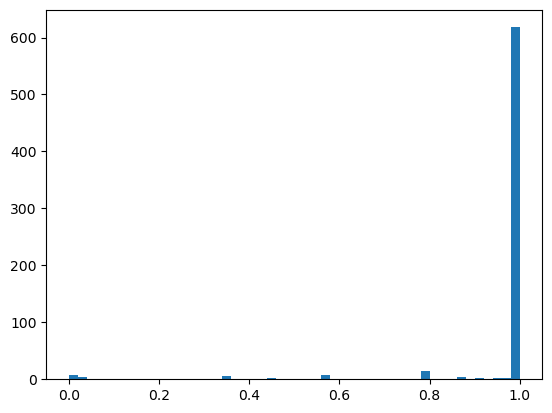

In [30]:
plt.hist(complete_array[1],bins=50)

In [49]:
def slice_per(source, step):
    return [source[i::step] for i in range(step)]

In [50]:
starting_flag = slice_per(flag[0],6)
starting_array = slice_per(complete_array[0],6)
for i in range(1,len(unique_producers)):
    next_flag = slice_per(flag[i],6)
    next_array = slice_per(complete_array[i],6)
    starting_flag = np.concatenate((starting_flag,next_flag))
    starting_array = np.concatenate((starting_array,next_array))

In [51]:
np.shape(starting_array)

(66, 113, 18)

In [52]:
np.savez("all_feat_split/data_train", data_gen_flag = starting_flag, data_feature = starting_array, data_attribute = attr)

In [26]:
np.shape(starting_array)

(66, 113, 1)

## Pickle gan.output.Output

In [53]:
sys.path.append(r"C:\Users\max\Anaconda\Research\DoppelGANger")
from gan.load_data import load_data
from gan import output
sys.modules["output"] = output

Messing around with parameters.

In [28]:
file = open('all_feat_split/data_attribute_output.pkl','wb')
        
data = []
data.append(output.Output(output.OutputType.DISCRETE,11,None,False))

pickle.dump(data,file)
file.close()

file = open('all_feat_split/data_feature_output.pkl','wb')
        
data = []
for i in range(18):
    data.append(output.Output(output.OutputType.CONTINUOUS,1,output.Normalization.ZERO_ONE,False))

pickle.dump(data,file)
file.close()